In [3]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8l.yaml")  # build a new model from scratch
model = YOLO("yolov8l.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model("https://ultralytics.com/images/bus.jpg",save=True)  # predict on an image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 83.7M/83.7M [00:12<00:00, 7.28MB/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 134k/134k [00:00<00:00, 7.36MB/s]


image 1/1 /workspace/keihin-prototype/train/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 103.7ms
Speed: 26.2ms preprocess, 103.7ms inference, 533.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /workspace/keihin-prototype/runs/detect/predict


Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../datasets/keihin-test-4/keihin-test-4.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 14.4MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    460288  ultralytics.nn.modules.block.C2f             [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /workspace/datasets/keihin-test-4/YOLO/labels/train... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<00:00, 862.76it/s]


train: New cache created: /workspace/datasets/keihin-test-4/YOLO/labels/train.cache


val: Scanning /workspace/datasets/keihin-test-4/YOLO/labels/val... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 384.25it/s]


val: New cache created: /workspace/datasets/keihin-test-4/YOLO/labels/val.cache
Plotting labels to /workspace/runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /workspace/runs/detect/train15
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.01G      1.025      3.552       1.07         10        640: 100%|██████████| 23/23 [00:07<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         40         40    0.00344          1      0.385      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.32G     0.9675      2.415      1.036          9        640: 100%|██████████| 23/23 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all         40         40    0.00465          1      0.699      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.34G     0.9406      2.032      1.035         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         40         40       0.56      0.652      0.703      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.36G     0.9527      1.915      1.062         18        640: 100%|██████████| 23/23 [00:02<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         40         40       0.57      0.754      0.727      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.38G     0.9998      1.788      1.084         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]

                   all         40         40      0.619      0.895      0.741      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.38G     0.9846      1.663      1.102         18        640: 100%|██████████| 23/23 [00:02<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all         40         40      0.605       0.86      0.804      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G       0.93      1.587      1.053         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         40         40      0.646      0.848      0.819       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.38G     0.9852      1.456      1.087         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         40         40       0.76      0.789      0.854      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.38G     0.9585      1.418      1.097         16        640: 100%|██████████| 23/23 [00:02<00:00,  9.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         40         40      0.696      0.927      0.872      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.4G     0.9268      1.349      1.079          8        640: 100%|██████████| 23/23 [00:02<00:00,  9.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all         40         40      0.894      0.931      0.946      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.4G     0.9389      1.209      1.079         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all         40         40      0.869      0.953      0.972      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.43G     0.9077      1.076      1.055         13        640: 100%|██████████| 23/23 [00:02<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.58it/s]

                   all         40         40      0.917      0.977      0.986      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.44G     0.9104      1.088      1.056         15        640: 100%|██████████| 23/23 [00:02<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         40         40      0.953      0.969      0.972       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.46G     0.8853     0.9844      1.039         16        640: 100%|██████████| 23/23 [00:02<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         40         40      0.863      0.958      0.974      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.47G     0.8384      0.921      1.057         10        640: 100%|██████████| 23/23 [00:02<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all         40         40      0.884       0.95      0.975      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       2.5G     0.8834     0.9537       1.06         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         40         40      0.951          1      0.993      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.52G     0.8591     0.8464      1.051          7        640: 100%|██████████| 23/23 [00:02<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all         40         40       0.96      0.926      0.967      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.53G     0.8313     0.7967      1.017         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         40         40      0.965      0.966      0.995        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.53G      0.848     0.8292       1.05          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         40         40      0.986      0.935      0.987      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.53G     0.8255     0.7331       1.02         16        640: 100%|██████████| 23/23 [00:02<00:00,  9.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]

                   all         40         40      0.904      0.972      0.973       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.53G     0.8114     0.7512      1.014         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all         40         40      0.942      0.962      0.978      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.53G     0.8344     0.7458      1.048         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all         40         40      0.912      0.949      0.947      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.53G     0.7964     0.7136      1.002         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.75it/s]

                   all         40         40      0.994      0.998      0.995      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.53G     0.8456     0.7184       1.05         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40         40      0.817      0.911      0.904      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.53G     0.8013     0.6921      1.015         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         40         40      0.977      0.992      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.53G     0.7855     0.6733      1.006         11        640: 100%|██████████| 23/23 [00:02<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         40         40       0.97      0.952      0.974      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.53G     0.8335     0.6926      1.026         10        640: 100%|██████████| 23/23 [00:02<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all         40         40      0.981      0.964      0.973      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.53G     0.8182      0.675      1.012         14        640: 100%|██████████| 23/23 [00:02<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         40         40       0.98      0.979      0.995      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.53G     0.7969     0.6604       1.02         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         40         40      0.971      0.953      0.992      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.53G     0.7864     0.6221      1.029         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all         40         40      0.989      0.998      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.53G     0.7966     0.6254      1.027         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]

                   all         40         40      0.991      0.977      0.974      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.53G     0.7567       0.59      1.001          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]

                   all         40         40      0.946      0.962      0.974      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.53G     0.7885     0.5707      1.002         17        640: 100%|██████████| 23/23 [00:02<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         40         40      0.956      0.862      0.918      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.53G     0.7422     0.5698     0.9886         20        640: 100%|██████████| 23/23 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         40         40      0.949      0.969      0.983      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.53G     0.7824     0.5652       1.02         14        640: 100%|██████████| 23/23 [00:02<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         40         40      0.979       0.99      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.53G     0.7792     0.5887      1.039         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all         40         40      0.991       0.97      0.979      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.53G     0.7504     0.5638     0.9874          8        640: 100%|██████████| 23/23 [00:02<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         40         40      0.982      0.977      0.976      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.53G     0.7416     0.5459      1.014         11        640: 100%|██████████| 23/23 [00:02<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all         40         40      0.985          1      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.53G     0.7275     0.5417      1.002          8        640: 100%|██████████| 23/23 [00:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         40         40       0.99      0.977      0.974      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.53G     0.7226     0.5332     0.9796          9        640: 100%|██████████| 23/23 [00:02<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         40         40      0.989      0.977      0.975      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.53G     0.7444     0.5319      1.006         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all         40         40      0.963      0.965      0.992      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.53G     0.7371     0.5018      1.011         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]

                   all         40         40      0.986      0.977      0.975      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.53G       0.74     0.5268      1.011         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         40         40      0.966       0.97      0.993      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.53G      0.755     0.5265      1.025         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all         40         40      0.968      0.982      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.53G     0.7289      0.533      1.002         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all         40         40      0.986      0.995      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.53G     0.7286      0.482     0.9849         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all         40         40      0.989          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.53G     0.7374     0.5055      1.012         19        640: 100%|██████████| 23/23 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all         40         40      0.981      0.995      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.53G     0.7208     0.4879      0.991         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         40         40      0.986      0.995      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.53G     0.7229     0.4749     0.9979          9        640: 100%|██████████| 23/23 [00:02<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all         40         40      0.992      0.982      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.53G     0.7013     0.4861     0.9852         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         40         40      0.985      0.984      0.995      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.53G     0.7129     0.5118     0.9803         18        640: 100%|██████████| 23/23 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         40         40      0.994      0.983      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.53G     0.6913     0.4793     0.9785         17        640: 100%|██████████| 23/23 [00:02<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         40         40      0.993      0.979      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.53G     0.7058     0.4576       0.98         10        640: 100%|██████████| 23/23 [00:02<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all         40         40      0.974      0.977      0.982      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.53G     0.7146      0.456     0.9813         14        640: 100%|██████████| 23/23 [00:02<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all         40         40      0.981      0.996      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.53G     0.6728     0.4294     0.9587         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all         40         40       0.99      0.997      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.53G      0.678     0.4383       0.98         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all         40         40      0.968      0.992      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.53G     0.6816     0.4412     0.9725         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all         40         40      0.987      0.998      0.995      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.53G     0.7095     0.4548     0.9917         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all         40         40      0.988      0.999      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.53G     0.6919     0.4428     0.9711         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all         40         40      0.942      0.993      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.53G     0.7077     0.4549     0.9863         11        640: 100%|██████████| 23/23 [00:02<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all         40         40      0.989      0.996      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.53G     0.6715     0.4182      0.963         14        640: 100%|██████████| 23/23 [00:02<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         40         40      0.989          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.53G     0.6618     0.4102     0.9598         10        640: 100%|██████████| 23/23 [00:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all         40         40      0.991      0.999      0.995      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.53G     0.6728     0.4212     0.9754         16        640: 100%|██████████| 23/23 [00:02<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         40         40      0.991      0.998      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.53G     0.6698     0.4377     0.9738         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         40         40      0.992          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.53G     0.6816     0.4519     0.9734         20        640: 100%|██████████| 23/23 [00:02<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all         40         40      0.982      0.977      0.976      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.53G      0.685     0.4333     0.9749          7        640: 100%|██████████| 23/23 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         40         40      0.985      0.974      0.976      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.53G     0.6762     0.4201     0.9739         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all         40         40      0.987      0.977      0.977      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.53G      0.673     0.4259     0.9773         12        640: 100%|██████████| 23/23 [00:02<00:00,  9.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all         40         40      0.985      0.999      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.53G     0.6423      0.405     0.9571          9        640: 100%|██████████| 23/23 [00:02<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all         40         40      0.984          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.53G     0.6348     0.4078     0.9536         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all         40         40      0.989          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.53G     0.6249     0.3998     0.9648         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]

                   all         40         40      0.986      0.998      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.53G      0.645     0.4075     0.9516         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all         40         40      0.974      0.953      0.978      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.53G     0.6498     0.4281     0.9706         15        640: 100%|██████████| 23/23 [00:02<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         40         40      0.985      0.996      0.995       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.53G     0.6822     0.4384     0.9892         10        640: 100%|██████████| 23/23 [00:02<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all         40         40      0.994      0.982      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.53G      0.623     0.4045     0.9673         13        640: 100%|██████████| 23/23 [00:02<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all         40         40      0.992      0.986      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.53G     0.5892     0.3838     0.9452         17        640: 100%|██████████| 23/23 [00:02<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]

                   all         40         40      0.992      0.983      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.53G     0.6238     0.3809     0.9582         10        640: 100%|██████████| 23/23 [00:02<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all         40         40      0.989      0.994      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.53G     0.6522     0.3807     0.9653          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all         40         40      0.991      0.997      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.53G     0.6127     0.3656     0.9579         11        640: 100%|██████████| 23/23 [00:02<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all         40         40      0.988      0.997      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.53G     0.5874     0.3593     0.9307         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all         40         40      0.987      0.977      0.979       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.53G     0.6278     0.3987      0.954         10        640: 100%|██████████| 23/23 [00:02<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         40         40      0.986      0.997      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.53G     0.6038     0.3731     0.9531         19        640: 100%|██████████| 23/23 [00:02<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all         40         40      0.985      0.996      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.53G     0.6348     0.3777     0.9794          9        640: 100%|██████████| 23/23 [00:02<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all         40         40      0.993      0.985      0.995      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.53G     0.5997     0.3673     0.9294         17        640: 100%|██████████| 23/23 [00:02<00:00,  9.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all         40         40      0.987      0.997      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.53G     0.5763     0.3558     0.9332         11        640: 100%|██████████| 23/23 [00:02<00:00,  9.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         40         40       0.99      0.977      0.979      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.53G     0.6022      0.373     0.9403         14        640: 100%|██████████| 23/23 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all         40         40      0.993      0.984      0.995      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.53G     0.5771      0.359      0.937         14        640: 100%|██████████| 23/23 [00:02<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         40         40      0.992      0.977      0.993      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.53G     0.5957      0.366     0.9514         11        640: 100%|██████████| 23/23 [00:02<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all         40         40      0.981      0.996      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.53G     0.5872     0.3502     0.9446         12        640: 100%|██████████| 23/23 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all         40         40      0.992      0.977      0.993      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.53G     0.5529     0.3435     0.9259         12        640: 100%|██████████| 23/23 [00:02<00:00,  8.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         40         40      0.983      0.996      0.995      0.844


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.53G     0.4815     0.3234     0.8503          8        640: 100%|██████████| 23/23 [00:03<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all         40         40      0.985      0.996      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.53G     0.4751     0.3147     0.8714          7        640: 100%|██████████| 23/23 [00:02<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all         40         40      0.984      0.996      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.53G     0.4882     0.2995     0.8832          8        640: 100%|██████████| 23/23 [00:02<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all         40         40      0.983      0.996      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.53G     0.4608      0.296     0.8613          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all         40         40      0.984      0.996      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.53G     0.4569     0.2908     0.8685          7        640: 100%|██████████| 23/23 [00:02<00:00,  9.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         40         40      0.993      0.986      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.53G     0.4777     0.3013     0.8658          7        640: 100%|██████████| 23/23 [00:02<00:00,  9.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all         40         40      0.992      0.987      0.995      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.53G     0.4626     0.2927     0.8677          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all         40         40      0.986      0.993      0.995      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.53G     0.4533     0.2871     0.8668          8        640: 100%|██████████| 23/23 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all         40         40      0.987      0.991      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.53G     0.4677     0.2975     0.8806          8        640: 100%|██████████| 23/23 [00:02<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all         40         40      0.992      0.985      0.995      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.53G     0.4788     0.2918     0.8804          7        640: 100%|██████████| 23/23 [00:02<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         40         40      0.993      0.984      0.995      0.836



100 epochs completed in 0.091 hours.
Optimizer stripped from /workspace/runs/detect/train15/weights/last.pt, 6.3MB
Optimizer stripped from /workspace/runs/detect/train15/weights/best.pt, 6.3MB

Validating /workspace/runs/detect/train15/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


                   all         40         40      0.988      0.977      0.993      0.848
               dogclip          9          9      0.994          1      0.995       0.87
              leafairy         11         11      0.969      0.909      0.988      0.852
              bluefish         11         11      0.996          1      0.995       0.83
             whitefish          9          9      0.993          1      0.995      0.839
Speed: 0.1ms preprocess, 9.1ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /workspace/runs/detect/train15
Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /workspace/datasets/keihin-test-4/YOLO/labels/val.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]


                   all         40         40      0.988      0.977      0.993      0.852
               dogclip          9          9      0.994          1      0.995       0.87
              leafairy         11         11      0.969      0.909      0.988      0.869
              bluefish         11         11      0.996          1      0.995       0.83
             whitefish          9          9      0.993          1      0.995      0.839
Speed: 2.1ms preprocess, 22.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to /workspace/runs/detect/train152

image 1/1 /workspace/train/1.jpg: 640x640 1 dogclip, 1 leafairy, 1 bluefish, 1 whitefish, 128.1ms
Speed: 5.1ms preprocess, 128.1ms inference, 4.9ms postprocess per image at shape (1, 3, 640, 640)


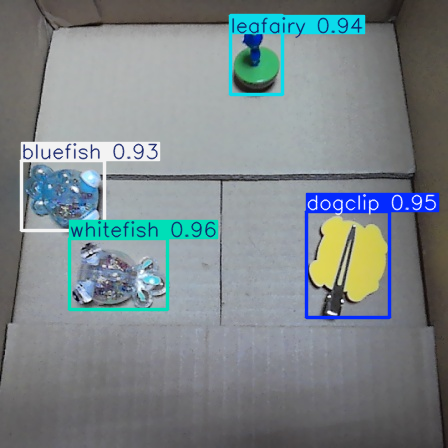

Ultralytics 8.3.101 🚀 Python-3.10.12 torch-2.6.0+cu124 CPU (AMD Ryzen 5 5600 6-Core Processor)

PyTorch: starting from '/workspace/runs/detect/train15/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success ✅ 2.3s, saved as '/workspace/runs/detect/train15/weights/best.onnx' (11.7 MB)

Export complete (4.1s)
Results saved to /workspace/runs/detect/train15/weights
Predict:         yolo predict task=detect model=/workspace/runs/detect/train15/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/workspace/runs/detect/train15/weights/best.onnx imgsz=640 data=../datasets/keihin-test-4/keihin-test-4.yaml  
Visualize:       https://netron.app


In [3]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolov8n.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="../datasets/keihin-test-4/keihin-test-4.yaml",  # Path to dataset configuration file
    epochs=100,  # Number of training epochs
    batch=16,
    imgsz=640,  # Image size for training
    device=0,  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
    augment=True,
)

# Evaluate the model's performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model("1.jpg")  # Predict on an image
results[0].show()  # Display results

# Export the model to ONNX format for deployment
path = model.export(format="onnx")  # Returns the path to the exported model

In [1]:
from ultralytics import YOLO
# import sys

# print(sys.path)
# net_name = sys.argv[1]
# input_width = int(sys.argv[2])
# input_height = int(sys.argv[3])

# Load a custom model
model = YOLO("../runs/detect/train15/weights/best.pt")

results = model("2.jpg")
# path = model.export(format="onnx", imgsz=[input_height, input_width])
path = model.export(format="onnx", imgsz=[224, 320]) # for MaixCam
print(path)


image 1/1 C:\Users\notba\Documents\source\repos\keihin-prototype\train\2.jpg: 640x640 2 dogclips, 1 leafairy, 1 bluefish, 1 whitefish, 18.0ms
Speed: 15.2ms preprocess, 18.0ms inference, 1180.3ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics 8.3.101  Python-3.9.13 torch-2.6.0+cu126 CPU (Intel Core(TM) i7-8650U 1.90GHz)

PyTorch: starting from '..\runs\detect\train15\weights\best.pt' with input shape (1, 3, 224, 320) BCHW and output shape(s) (1, 8, 1470) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.49...
ONNX: export success  6.4s, saved as '..\runs\detect\train15\weights\best.onnx' (11.6 MB)

Export complete (7.0s)
Results saved to C:\Users\notba\Documents\source\repos\keihin-prototype\runs\detect\train15\weights
Predict:         yolo predict task=detect model=..\runs\detect\train15\weights\best.onnx imgsz=224,320  
Validate:        yolo val task=detect model=..\runs\detect\train15\weights\best.onnx imgsz=224,320 data=../da